In [34]:
# 신뢰성 문제와 거짓 정보 전파, 윤리적 고민과 규제 도전
# -딥페이크, AI목소리

# 과기정통부, 국내 AI신뢰성 인증기업 : https://www.newsis.com/view/?id=NISX20240206_0002618180&cID=13007&pID=13100
# 한국정보통신기술협회(TTA)  : 신뢰성 인증제도

title 개수: 10
title 개수: 20
title 개수: 30
title 개수: 40
title 개수: 50
title 개수: 60
title 개수: 70
title 개수: 80
title 개수: 90
title 개수: 100
title 개수: 110
title 개수: 120
title 개수: 130
title 개수: 140
title 개수: 150
title 개수: 160
title 개수: 170
title 개수: 180
title 개수: 190
title 개수: 200
title : ['챗GPT 내 성향 외우는 ‘기억’ 탑재···개인정보 침해 우려도', '파수, \'AI바우처\' 수요기업 모집 "AI로 개인정보 보호"', '‘내 CT사진’ AI가 맘대로 쓴다고?…의료 민감정보 활용, 물꼬 튼다', '개인정보위, AI 운영 기업 실태점검…네이버·챗GPT 등 10여곳', "모질라, 직원 60명 정리 해고.. 파이어폭스 '인공지능(AI)' 집중", '인공지능의 직관: Intuition of AI', 'LG 그램 노트북, 인공지능 강화한다', "개보위, 생성형AI '개인정보 자기결정권' 침해 실태점검", '\'빅테크 소송전\' 개인정보위, 구글·MS 등과 간담회…"법 준수 요청"', '이미지·영상 가명처리 기준 나왔다…AI시대 개인정보 유출 최소화', "하버드대학교 옌칭 연구소 '가짜뉴스, 할루시네이션 잡을 인공지능 보안에 관심' 표명", '생성형 AI 만난 금융업.. "인공지능 프레임워크 구축 필수"', '영역 넓히는 AI 챗봇 서비스…‘환각 현상’ 부작용 낮출 ‘RAG’ 기술 눈길', "'개인정보 기술포럼' 총회 개최…“산업 뒷받침할 전문인력 양성 필요”", "헤이딜러, AI로 '중고차 숨은이력 찾기' 고객 개인정보 보호한다", '[단독] 정부, 네카오 등 AI 개발사 개인정보결정권 침해 점검', '구글 "AI기술로 개인정보 보호 강화"', '웜·사기 GPT의 공격…삼성SDS가 꼽은 올해 사이버보안 위협 5선', '개인정보위원장 "챗GPT 시대…AI·정

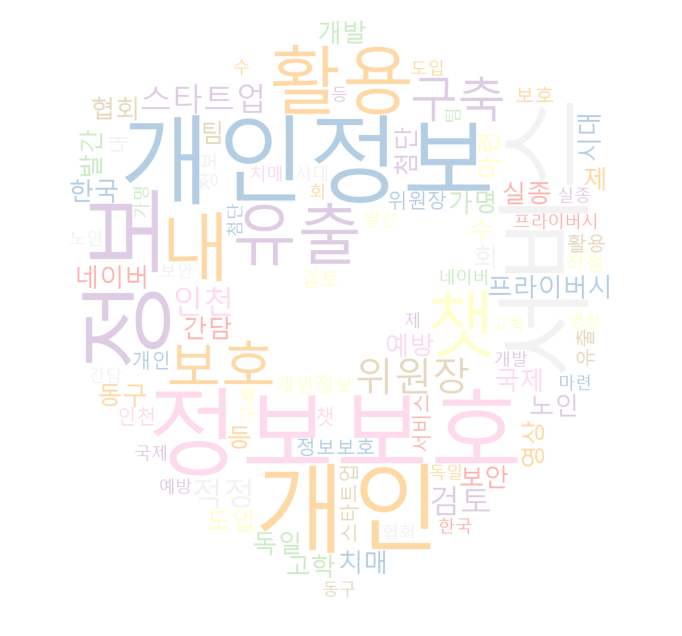

In [35]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image

def get_titles(start_num, end_num, search_word, title_list):
    # start_num ~ end_num까지 크롤링
    while start_num <= end_num:
        url = ('https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.
        format(search_word, start_num))
        req = requests.get(url)
        time.sleep(1)
        if req.ok: # 정상적인 request 확인
            soup = BeautifulSoup(req.text, 'html.parser')
            news_titles = soup.find_all('a', {'class': 'news_tit'})
            for news in news_titles:
                title_list.append(news['title'])
        start_num += 10
        print('title 개수:', len(title_list))
    print('title :', title_list)
    return title_list
        
def make_wordcloud(title_list, stopwords, word_count): # 딕셔너리로 만듦
    okt = Okt()
    sentences_tag = []
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence) # 품사를 각각 파악, morph에는 형태소와 품사 정보가 담김
        sentences_tag.append(morph)
        print(morph)
        print('-' * 80)
    noun_adj_list = []
    # 명사와 형용사만 구분하여 리스트에 추가
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print('-' * 80)
    print(tags)
    tag_dict = dict(tags)
    # 검색어 제외 방법 2: dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    img_mask = np.array(Image.open('insurance.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                      background_color="white", max_font_size=200,
                      repeat=True, colormap='Pastel1',
                      mask=img_mask, collocations=False, max_words=50)

    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    
if __name__ == '__main__':
    search_word = "인공지능+개인정보" 
    title_list = []
    stopwords = [search_word, '데이터','인공','지능','신뢰','처리','기술','기반','산업','생','아이','도','위','티','확산'] 
    data_list=get_titles(1, 200, search_word, title_list)
    make_wordcloud(title_list, stopwords, 50)
    

In [36]:
#1.내용 비교: 크롤링한 다수의 문서 간의 유사도를 분석하여 특정 주제나 내용이 얼마나 비슷한지 측정합니다.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 예시 문서 데이터
documents = data_list
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 출력
for i in range(len(documents)):
    for j in range(i+1, len(documents)):
        print(f"Similarity between Document {i+1} and Document {j+1}: {cosine_similarities[i][j]}")


Similarity between Document 1 and Document 2: 0.04442965752733132
Similarity between Document 1 and Document 3: 0.0
Similarity between Document 1 and Document 4: 0.08664545948909048
Similarity between Document 1 and Document 5: 0.0
Similarity between Document 1 and Document 6: 0.0
Similarity between Document 1 and Document 7: 0.0
Similarity between Document 1 and Document 8: 0.16849818975314568
Similarity between Document 1 and Document 9: 0.0
Similarity between Document 1 and Document 10: 0.040091849462658376
Similarity between Document 1 and Document 11: 0.0
Similarity between Document 1 and Document 12: 0.0
Similarity between Document 1 and Document 13: 0.0
Similarity between Document 1 and Document 14: 0.03811641263564735
Similarity between Document 1 and Document 15: 0.04078570774533921
Similarity between Document 1 and Document 16: 0.10117555980455412
Similarity between Document 1 and Document 17: 0.059472049825892694
Similarity between Document 1 and Document 18: 0.0
Similarity 

In [37]:
# 5. Non-Negative Matrix Factorization (NMF): 문서와 단어 간의 행렬을 분해하여 주제를 추출하는 방법 중 하나입니다.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 예시 문서 데이터
documents = data_list

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# NMF 모델 생성
num_topics = 4  # 주제의 수를 설정
nmf_model = NMF(n_components=num_topics, random_state=42)

# NMF 모델을 이용하여 문서-단어 행렬 분해
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# 주제와 연관된 단어 출력
feature_names = vectorizer.get_feature_names_out()
topic_words = []
topic_list=[]
for topic_idx, topic in enumerate(nmf_model.components_):
    top_word_indices = topic.argsort()[-5:][::-1]  # 각 주제별 상위 5개 단어 선택
    top_words = [feature_names[i] for i in top_word_indices]
    topic_words.append(top_words)
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")
    topic_list.append(', '.join(top_words))
# 문서별 주제 할당
doc_topic_assignments = nmf_model.transform(tfidf_matrix)
print("\nDocument-Topic Assignments:")
arg_list=[]
for i, doc_topic in enumerate(doc_topic_assignments):
    print(f"Document #{i + 1}: Topic #{doc_topic.argmax() + 1}")
    arg_list.append(doc_topic.argmax() + 1)
counts = Counter(arg_list)

Topic #1: 손안의, 온디바이스, 짤막상식, ai, 인공지능
Topic #2: 인천, 치매노인, 첨단, 동구, 지능형
Topic #3: 개인정보보호, 네이버, 발간, 백서, 담은
Topic #4: 개인정보위, 사전적정성, 검토제, 간담회, 의결

Document-Topic Assignments:
Document #1: Topic #4
Document #2: Topic #4
Document #3: Topic #4
Document #4: Topic #4
Document #5: Topic #1
Document #6: Topic #1
Document #7: Topic #1
Document #8: Topic #4
Document #9: Topic #4
Document #10: Topic #4
Document #11: Topic #1
Document #12: Topic #1
Document #13: Topic #2
Document #14: Topic #4
Document #15: Topic #4
Document #16: Topic #1
Document #17: Topic #4
Document #18: Topic #4
Document #19: Topic #1
Document #20: Topic #1
Document #21: Topic #1
Document #22: Topic #4
Document #23: Topic #1
Document #24: Topic #4
Document #25: Topic #1
Document #26: Topic #4
Document #27: Topic #4
Document #28: Topic #3
Document #29: Topic #1
Document #30: Topic #4
Document #31: Topic #1
Document #32: Topic #4
Document #33: Topic #4
Document #34: Topic #3
Document #35: Topic #4
Document #36: Topic #4
Document #37

In [38]:
import pandas as pd
print(counts)
print(dict(counts))
df=pd.DataFrame([dict(counts)])
df=df[[1,2,3,4]]
df

Counter({4: 96, 1: 56, 3: 25, 2: 23})
{4: 96, 1: 56, 2: 23, 3: 25}


,1,2,3,4
0,56,23,25,96


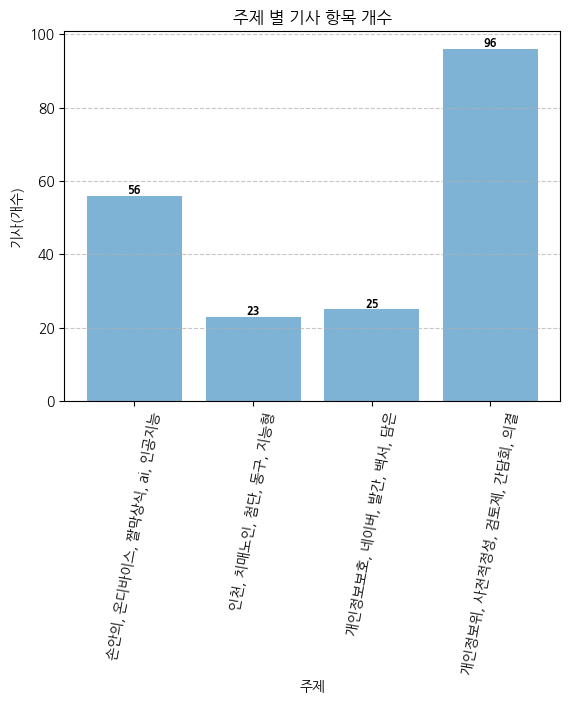

In [39]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 주어진 데이터
x = df.columns
y = df.loc[0]

# 그래프 그리기
plt.bar(x, y, color='#7FB3D5')  # 색상을 온화한 파란색으로 지정
plt.xlabel('주제')  # x축 레이블 변경
plt.ylabel('기사(개수)')  # y축 레이블 변경
plt.title('주제 별 기사 항목 개수')  # 그래프 제목 변경
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에 그리드 적용
plt.xticks(range(1,5), topic_list, rotation=80)

# 그래프에 수치 표시
for i, v in enumerate(y, start=1):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.show()


In [40]:
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

In [41]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [42]:
#pip install googletrans==4.0.0-rc1
from googletrans import Translator
import nltk
nltk.download('vader_lexicon')  # VADER Lexicon 다운로드
total_list=[]
def translate_list_elements(input_list, target_language='en'):
    translator = Translator()
    translation_result = []

    for element in input_list:
        translation = translator.translate(element, dest=target_language).text
        translation_result.append({element: translation})

    return translation_result

# 예시 리스트
#original_list = data_list[0:20]

# 번역 실행
for i in data_list:
    translated_dict_list = translate_list_elements([i])
    total_list.append(translated_dict_list)
# # 결과 출력
# for translation_dict in translated_dict_list:
#     print(translation_dict)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
emotional_result=dict()
for i in total_list:
    if swn_polarity(list(i[0].values())[0]) :
        emotional_result.setdefault(list(i[0].items())[0][0], "1")
    else :
        emotional_result.setdefault(list(i[0].items())[0][0], "0")

In [44]:
import pandas as pd
df = pd.DataFrame(emotional_result.items(), columns=['title', 'result'])

In [56]:
result=df["result"].value_counts()

result
1    87
0    42
Name: count, dtype: int64

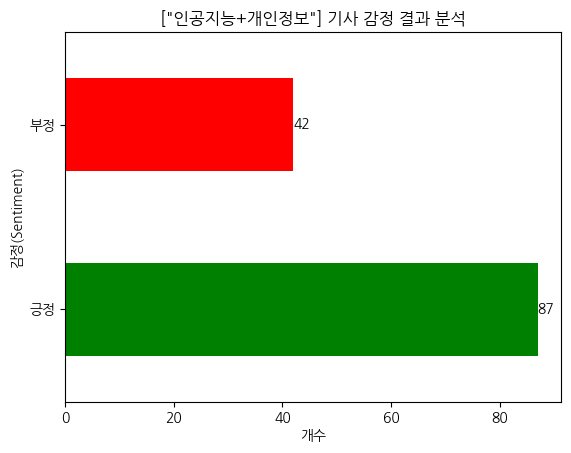

In [47]:
import matplotlib.pyplot as plt

# 주어진 Series
result_series = result

# 그래프 그리기
colors = ['green', 'red']  # 긍정은 녹색, 부정은 빨강색
ax = result_series.plot(kind='barh', color=colors)

plt.xlabel('개수')
plt.ylabel('감정(Sentiment)')
plt.yticks(range(2),["긍정","부정"])
plt.title('["인공지능+개인정보"] 기사 감정 결과 분석')

# 각 막대 위에 값 표시
for index, value in enumerate(result_series):
    plt.text(value, index, str(value), va='center')

plt.show()


In [58]:
df[df["result"]=="1"]

,title,result
0,챗GPT 내 성향 외우는 ‘기억’ 탑재···개인정보 침해 우려도,1
2,"‘내 CT사진’ AI가 맘대로 쓴다고?…의료 민감정보 활용, 물꼬 튼다",1
4,"모질라, 직원 60명 정리 해고.. 파이어폭스 '인공지능(AI)' 집중",1
6,"LG 그램 노트북, 인공지능 강화한다",1
7,"개보위, 생성형AI '개인정보 자기결정권' 침해 실태점검",1
...,...,...
114,"개인정보위, ‘사전적정성 검토제’ 기반 마련 착수",1
116,"개인정보위, AI CCTV·동형암호 데이터 등 사전적정성 검토 2건 의결",1
118,개인정보위 ‘사전적정성 검토제’ 제도적 기반 마련한다,1
119,"ICT규제샌드박스, 자율주행 인공지능 학습에 영상 정보 원본 활용 허용",1
